<a href="https://colab.research.google.com/github/aetev/Learning-stuff-/blob/main/auido%20gan%20ting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
from scipy.signal import stft
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
from IPython.display import Audio
import librosa.display

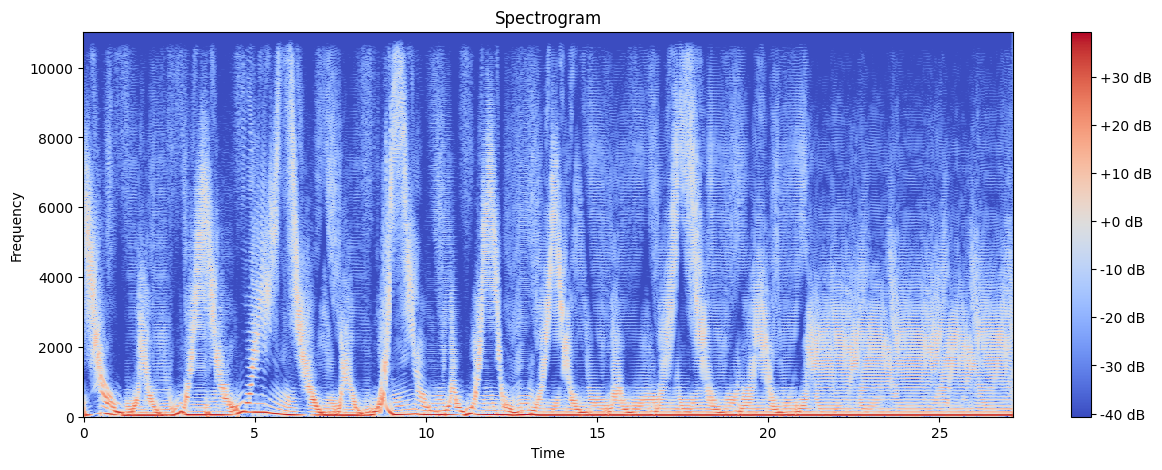

In [18]:
# Read the audio file
x, sr = librosa.load('/content/drive/MyDrive/bass samples/NBdusty.wav')

# Perform STFT
n_fft = 2048  # Number of FFT points
hop_length = 256 # Number of samples between successive frames

# Perform STFT with increased resolution
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

Xdb = librosa.amplitude_to_db(np.abs(X))

# Plot the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram')
plt.show()

In [19]:
# Determine the parameters
sample_rate = sr # Sample rate of the audio file
desired_length = 1  # Desired length of each batch in seconds
stride_length = 0.5  # Stride length in seconds

# Convert stride length to frames
stride_frames = librosa.time_to_frames(stride_length, sr=sample_rate)

# Perform STFT on the audio file
X = librosa.stft(x)

# Convert desired length to frames
desired_frames = librosa.time_to_frames(desired_length, sr=sample_rate)

# Iterate through the spectrogram and split into batches
num_frames = X.shape[1]
batches = []
for i in range(0, num_frames - desired_frames + 1, stride_frames):
    batch = X[:, i:i + desired_frames]
    if batch.shape[1] < desired_frames:
        pad = np.zeros((X.shape[0], desired_frames - batch.shape[1]))
        batch = np.concatenate((batch, pad), axis=1)
    batches.append(batch)

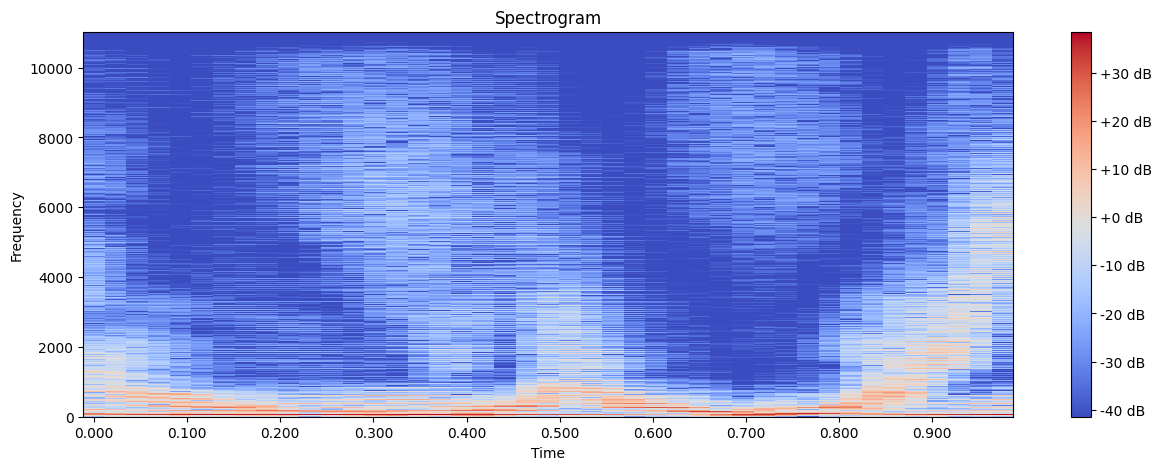

In [29]:
Xtest = librosa.amplitude_to_db(np.abs(batches[10]))

# Plot the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xtest, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram')
plt.show()

In [ ]:
# Save audio signal as WAV file
wavfile.write('output.wav', sample_rate, combined_array)

In [30]:
# Convert the spectrogram back to audio using inverse STFT
reconstructed_audio = librosa.istft(batches[10])

# Specify the path to the audio file
audio_path = '/content/test/test.wav'

# Play the audio
Audio(reconstructed_audio,rate=sr)